In [6]:
import pandas as pd
import sys 
sys.path.append("../src/")
import numpy as np

import analyse_exploratoire as ae

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../data/train.csv')

C:\Users\baheu\AppData\Local\Temp\ipykernel_30584\2903432033.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/train.csv')


In [8]:
df.head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,z (Wh/km),IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,Date of registration,Fuel consumption,Electric range (km)
0,0,DE,IP-C519_2022_00008-WF0-1,FORD,FORD WERKE GMBH,FORD WERKE GMBH,NaN,e13*2007/46*1911*15,DEH,R0DB1NX,...,NaN,e13 32 37,NaN,2.30,NaN,NaN,P,2022-08-29,5.6,NaN
1,1,FR,IP-MQB27ZZ_A2_0529-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*1783*29,AW,ABDLAC,...,NaN,e1 29,NaN,1.14,NaN,NaN,P,2022-02-22,5.5,NaN
2,2,FR,IP-MQB27ZZ_A1_0533-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*1783*29,AW,ABDLAC,...,NaN,e1 29,NaN,1.14,NaN,NaN,P,2022-03-26,5.6,NaN
3,3,DE,IP-04-U5Y-2018-1137,KIA,KIA SLOVAKIA,KIA SLOVAKIA SRO,NaN,e4*2007/46*1299*18,CD,BAP71,...,NaN,e4 28,NaN,0.80,NaN,NaN,P,2022-09-01,6.8,NaN
4,4,FR,IP-MQB27ZZ_B2_0534-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,NaN,e1*2007/46*1783*29,AW,ABDLAA,...,NaN,e1 29,NaN,1.14,NaN,NaN,P,2022-01-21,5.9,NaN


In [9]:
analyse = ae.DataAnalysis(df)
col_numericals, col_categorical = analyse.get_numericals_categoricals()

print(f'liste des colonnes numériques {col_numericals}')
print(f'liste des colonnes catégorielles {col_categorical}')

liste des colonnes numériques ['ID', 'MMS', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)', 'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'Ernedc (g/km)', 'Erwltp (g/km)', 'De', 'Vf', 'Fuel consumption ', 'Electric range (km)']
liste des colonnes catégorielles ['Country', 'VFN', 'Mp', 'Mh', 'Man', 'Tan', 'T', 'Va', 'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'Ft', 'Fm', 'IT', 'Status', 'Date of registration']


In [10]:
for col in df.columns:
    print(f'{col} : {np.round((df[col].isna().sum())/len(df)*100)} % de valeurs manquantes')

ID : 0.0 % de valeurs manquantes
Country : 0.0 % de valeurs manquantes
VFN : 9.0 % de valeurs manquantes
Mp : 6.0 % de valeurs manquantes
Mh : 0.0 % de valeurs manquantes
Man : 0.0 % de valeurs manquantes
MMS : 100.0 % de valeurs manquantes
Tan : 0.0 % de valeurs manquantes
T : 0.0 % de valeurs manquantes
Va : 0.0 % de valeurs manquantes
Ve : 0.0 % de valeurs manquantes
Mk : 0.0 % de valeurs manquantes
Cn : 2.0 % de valeurs manquantes
Ct : 0.0 % de valeurs manquantes
Cr : 0.0 % de valeurs manquantes
r : 0.0 % de valeurs manquantes
m (kg) : 0.0 % de valeurs manquantes
Mt : 11.0 % de valeurs manquantes
Enedc (g/km) : 84.0 % de valeurs manquantes
Ewltp (g/km) : 0.0 % de valeurs manquantes
W (mm) : 0.0 % de valeurs manquantes
At1 (mm) : 2.0 % de valeurs manquantes
At2 (mm) : 2.0 % de valeurs manquantes
Ft : 0.0 % de valeurs manquantes
Fm : 0.0 % de valeurs manquantes
ec (cm3) : 14.0 % de valeurs manquantes
ep (KW) : 0.0 % de valeurs manquantes
z (Wh/km) : 78.0 % de valeurs manquantes
IT : 

 **Variables à supprimer** : 
- MMS 
- ERNEDC
- De
- Vf
- r
- Status


# Outliers

In [13]:
df_sans_col_inutiles = df.drop(columns = ['MMS','Ernedc (g/km)','De','Vf','r','Status'])

In [14]:
analyse = ae.DataAnalysis(df_sans_col_inutiles)
col_numericals, col_categorical = analyse.get_numericals_categoricals()

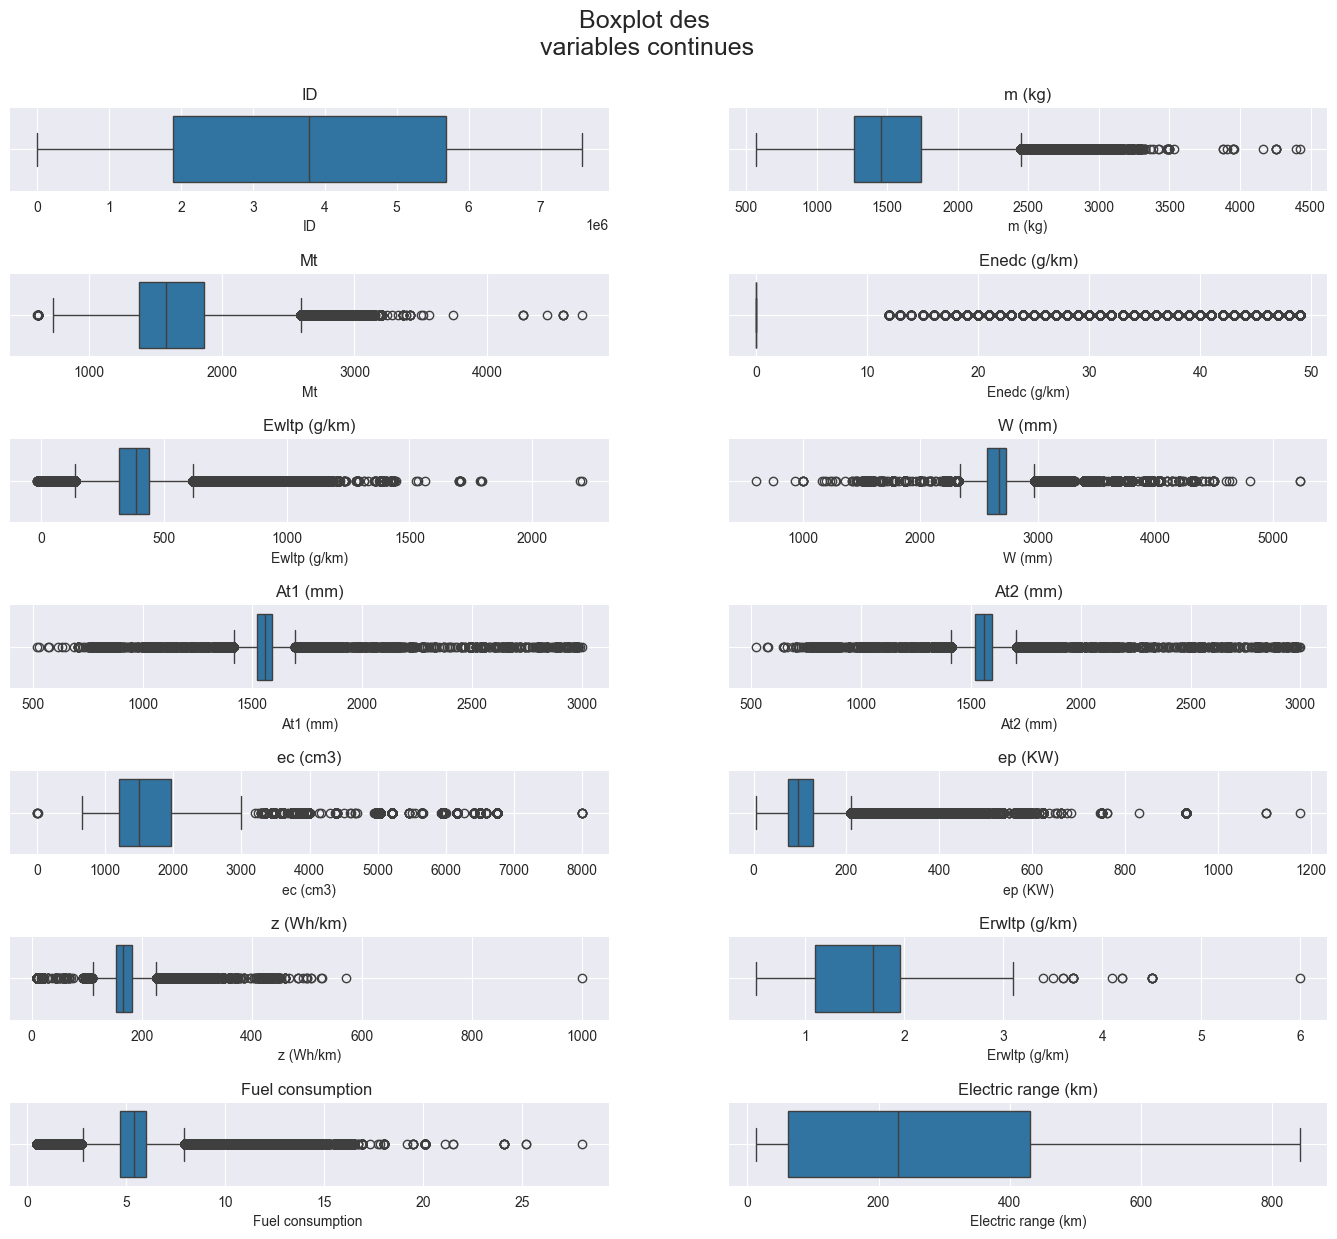

In [15]:
ncols = 2
nrows = len(col_numericals) // ncols + (len(col_numericals) % ncols > 0)
 
plt.figure(figsize=(17, 14))
plt.subplots_adjust(hspace=1)
plt.suptitle("Boxplot des \nvariables continues", fontsize=18, y=0.95)
 
for n, variable in enumerate(col_numericals):
    ax = plt.subplot(nrows, ncols, n + 1)
 
    sns.boxplot(ax=ax, data=analyse.df[variable], orient='h')
    
    ax.grid(which='major', axis='y')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    ax.set_title(variable, loc= 'center', fontsize=12)

In [16]:
is_outlier = analyse.is_outlier()

outliers_df = analyse.display_outliers()
outliers_df

,is_outlier_ID,is_outlier_m (kg),is_outlier_Mt,is_outlier_Enedc (g/km),is_outlier_Ewltp (g/km),is_outlier_W (mm),is_outlier_At1 (mm),is_outlier_At2 (mm),is_outlier_ec (cm3),is_outlier_ep (KW),is_outlier_z (Wh/km),is_outlier_Erwltp (g/km),is_outlier_Fuel consumption,is_outlier_Electric range (km)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7571644,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7571645,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7571646,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7571647,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,Colonne,Nombre,Pourcentage d'outliers
0,is_outlier_Ewltp (g/km),1854521,24.492961
1,is_outlier_Fuel consumption,840487,11.100449
2,is_outlier_W (mm),611492,8.076074
3,is_outlier_ep (KW),484959,6.404932
4,is_outlier_At1 (mm),354853,4.686601
5,is_outlier_At2 (mm),278556,3.678934
6,is_outlier_Enedc (g/km),200904,2.653372
7,is_outlier_z (Wh/km),129358,1.708452
8,is_outlier_Mt,129184,1.706154
9,is_outlier_m (kg),123257,1.627875


In [17]:
def_variable = {
    "ID": "Identification number",
    "MS": "Member state",
    "Mp": "Manufacturer pooling",
    "VFN": "Vehicle family identification number",
    "Mh": "Manufacturer name",
    "EU standard denomination": "EU standard denomination",
    "Man": "Manufacturer name OEM declaration",
    "MMS": "Manufacturer name MS registry denomination",
    "Tan": "Type approval number",
    "T": "Type",
    "Va": "Variant",
    "Ve": "Version",
    "Mk": "Make",
    "Cn": "Commercial name",
    "Ct": "Category of the vehicle type approved",
    "Cr": "Category of the vehicle registered",
    "m (kg)": "Mass in running order Completed/complete vehicle",
    "Mt": "WLTP test mass",
    "Enedc (g/km)": "Specific CO2 Emissions (NEDC)",
    "Ewltp (g/km)": "Specific CO2 Emissions (WLTP)",
    "W (mm)": "Wheel Base",
    "At1 (mm)": "Axle width steering axle",
    "At2 (mm)": "Axle width other axle",
    "Ft": "Fuel type",
    "Fm": "Fuel mode",
    "ec (cm3)": "Engine capacity",
    "ep (KW)": "Engine power",
    "z (Wh/km)": "Electric energy consumption",
    "IT": "Innovative technology or group of innovative technologies",
    "Ernedc (g/km)": "Emissions reduction through innovative technologies",
    "Erwltp (g/km)": "Emissions reduction through innovative technologies (WLTP)",
    "De": "Deviation factor",
    "Vf": "Verification factor",
    "r": "Total new registrations",
    "Country" : "country", 
    "Status" : "Status", 
    'Date of registration' : "Date of Registration"
}

# Variables categorielles

In [20]:
df_sans_col_inutiles[col_categorical].head(50)

,Country,VFN,Mp,Mh,Man,Tan,T,Va,Ve,Mk,Cn,Ct,Cr,Ft,Fm,IT,Date of registration
0,DE,IP-C519_2022_00008-WF0-1,FORD,FORD WERKE GMBH,FORD WERKE GMBH,e13*2007/46*1911*15,DEH,R0DB1NX,5BSCENA5JBS,FORD,FOCUS,M1,M1,PETROL,H,e13 32 37,2022-08-29
1,FR,IP-MQB27ZZ_A2_0529-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,e1*2007/46*1783*29,AW,ABDLAC,FM5FM5DF008N3VR24BI1CA0I,VOLKSWAGEN,POLO,M1,M1,PETROL,M,e1 29,2022-02-22
2,FR,IP-MQB27ZZ_A1_0533-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,e1*2007/46*1783*29,AW,ABDLAC,FD7FD7CW005N2VR24BI1AA0I,VOLKSWAGEN,POLO,M1,M1,PETROL,M,e1 29,2022-03-26
3,DE,IP-04-U5Y-2018-1137,KIA,KIA SLOVAKIA,KIA SLOVAKIA SRO,e4*2007/46*1299*18,CD,BAP71,D73F12,KIA,PROCEED,M1,M1,PETROL,M,e4 28,2022-09-01
4,FR,IP-MQB27ZZ_B2_0534-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,e1*2007/46*1783*29,AW,ABDLAA,FD7FD7CW005N2VR24BI1CB0I,VOLKSWAGEN,POLO,M1,M1,PETROL,M,e1 29,2022-01-21
5,CZ,IP-MQB27ZZ_A0_1019-TMB-1,VOLKSWAGEN,SKODA,SKODA AUTO AS,e8*2018/858*00014*01,PJ,ABDLACX0,NFM5FM5DF0084BI3D1A1A,SKODA,FABIA,M1,M1,PETROL,M,e8 29 37,2022-05-05
6,DE,IP-04-U5Y-2018-1137,KIA,KIA SLOVAKIA,KIA SLOVAKIA SRO,e4*2007/46*1299*18,CD,BAP71,D73F12,KIA,PROCEED,M1,M1,PETROL,M,e4 28,2022-09-20
7,FR,IP-MQB27ZZ_B2_0534-WVW-1,VOLKSWAGEN,VOLKSWAGEN,VOLKSWAGEN AG,e1*2007/46*1783*29,AW,ABDLAA,FD7FD7CW005N2VR24BI1CB0I,VOLKSWAGEN,POLO,M1,M1,PETROL,M,e1 29,2022-01-12
8,CZ,IP-MQB27ZZ_A0_1019-TMB-1,VOLKSWAGEN,SKODA,SKODA AUTO AS,e8*2018/858*00014*01,PJ,ABDLACX0,NFM5FM5DF0084BI3D1A1A,SKODA,FABIA,M1,M1,PETROL,M,e8 29 37,2022-02-14
9,DE,IP-2021_0416-W1K-1,MERCEDES-BENZ,MERCEDES-BENZ AG,MERCEDES-BENZ AG,e1*2007/46*1912*18,F2CLA,338QT2,HZAA054A,MERCEDES-BENZ,CLA 250 E,M1,M1,PETROL/ELECTRIC,P,NaN,2022-11-25


In [42]:
df[df['Cr']=='M1' & df['W (mm)']<1000]

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]